# Email Spam Detection


Here we are going to create a model that can predict the mail is a Spam(1)/Not a Spam(0), using the provided subject of the email.

In [ ]:
# Modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Data Set

#### The dataset used in this example is sourced from Kaggle (original authors Almeida and Hidalgo, 2011) is provided below.
* [Spam test Dataset](https://www.kaggle.com/datasets/team-ai/spam-text-message-classification)



In [ ]:
#Load Data
dataset = pd.read_csv('/content/drive/MyDrive/SPAMtextmessage.csv')
# Convert ham to 0 and spam to 1
dataset['Category']= dataset['Category'].str.replace('ham','0')
dataset['Category']= dataset['Category'].str.replace('spam','1')
dataset['Category']= dataset['Category'].astype(int)
sentences = dataset['Message'].tolist()
labels = dataset['Category'].tolist()
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)
# Sentence variables
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
# Labels variables
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


## Visualizing the Data Labels

As the is only 2 output in labels that is 0(Not Spam) and 1 (Spam) using a bar /pie chart is ideal for visualization.

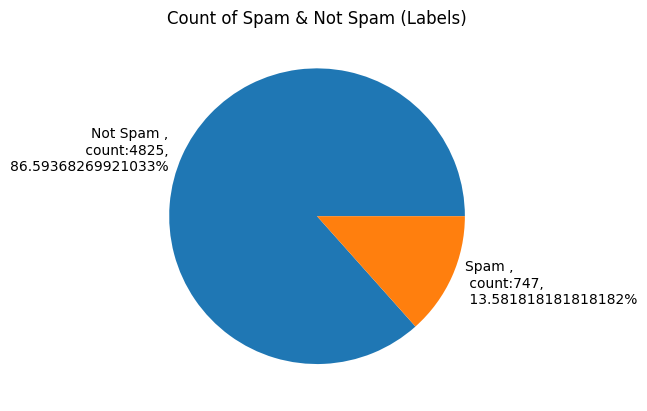

In [ ]:
zero_count =int(labels.count(0))
one_count = int(len(labels))-zero_count

c = [zero_count,one_count]
plt.title('Count of Spam & Not Spam (Labels)')
plt.pie(c,labels=[f'Not Spam ,\n count:{zero_count},\n{zero_count/(int(len(labels))*0.01)}%',f'Spam ,\n count:{one_count},\n {one_count/int(len(labels)*0.01)}%'])
plt.show()

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type,
                       truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           80000     
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_16 (Dense)            (None, 6)                 9606      
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 89,613
Trainable params: 89,613
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 20
history=model.fit(padded, training_labels_final, epochs=num_epochs,batch_size=128, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
35/35 [==============================] - 1s 12ms/step - loss: 0.4622 - accuracy: 0.8643 - val_loss: 0.3536 - val_accuracy: 0.8700
Epoch 2/20
35/35 [==============================] - 0s 7ms/step - loss: 0.3190 - accuracy: 0.8649 - val_loss: 0.2635 - val_accuracy: 0.8700
Epoch 3/20
35/35 [==============================] - 0s 11ms/step - loss: 0.2145 - accuracy: 0.8649 - val_loss: 0.1685 - val_accuracy: 0.8700
Epoch 4/20
35/35 [==============================] - 0s 13ms/step - loss: 0.1613 - accuracy: 0.8649 - val_loss: 0.1476 - val_accuracy: 0.8700
Epoch 5/20
35/35 [==============================] - 0s 10ms/step - loss: 0.1428 - accuracy: 0.9598 - val_loss: 0.1371 - val_accuracy: 0.9731
Epoch 6/20
35/35 [==============================] - 0s 11ms/step - loss: 0.1303 - accuracy: 0.9767 - val_loss: 0.1299 - val_accuracy: 0.9776
Epoch 7/20
35/35 [==============================] - 0s 11ms/step - loss: 0.1213 - accuracy: 0.9841 - val_loss: 0.1246 - val_accuracy: 0.9803
Epoch 8/20
35/

In [ ]:
model.evaluate(testing_padded,testing_labels_final)
model_testpredition = model.predict(testing_padded,batch_size=128)
print(model_testpredition[3])
testing_padded[3]
print(testing_sentences[3])
print(testing_labels_final[3])

9/9 [==============================] - 0s 3ms/step
[0.60412675]
Welcome to UK-mobile-date this msg is FREE giving you free calling to 08719839835. Future mgs billed at 150p daily. To cancel send "go stop" to 89123
1


<Axes: >

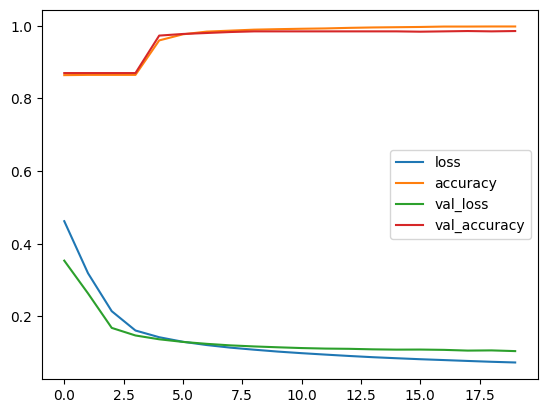

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# Optimal learning rate.
model2= tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])
# Compile
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Learning rate Schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
# fitting
hist=model2.fit(padded,training_labels_final,epochs=100,callbacks=[lr_schedular],batch_size=500,validation_data=(testing_padded,testing_labels_final))

Epoch 1/100
9/9 [==============================] - 2s 77ms/step - loss: 1.1798 - accuracy: 0.8649 - val_loss: 0.5462 - val_accuracy: 0.8700 - lr: 1.0000e-04
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 0.5238 - accuracy: 0.8649 - val_loss: 0.4409 - val_accuracy: 0.8700 - lr: 1.1220e-04
Epoch 3/100
9/9 [==============================] - 0s 18ms/step - loss: 0.4377 - accuracy: 0.8649 - val_loss: 0.4028 - val_accuracy: 0.8700 - lr: 1.2589e-04
Epoch 4/100
9/9 [==============================] - 0s 22ms/step - loss: 0.4090 - accuracy: 0.8649 - val_loss: 0.3873 - val_accuracy: 0.8700 - lr: 1.4125e-04
Epoch 5/100
9/9 [==============================] - 0s 18ms/step - loss: 0.3964 - accuracy: 0.8649 - val_loss: 0.3788 - val_accuracy: 0.8700 - lr: 1.5849e-04
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3876 - accuracy: 0.8649 - val_loss: 0.3714 - val_accuracy: 0.8700 - lr: 1.7783e-04
Epoch 7/100
9/9 [==============================] - 0s 20ms

Text(0, 0.5, 'Learning Rate')

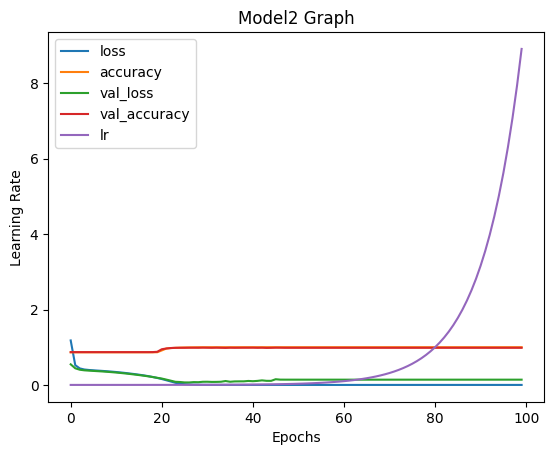

In [ ]:
pd.DataFrame(hist.history).plot()
plt.title('Model2 Graph')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')

In [ ]:
model2.evaluate(testing_padded,testing_labels_final)

35/35 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9848


[0.13940833508968353, 0.9847533702850342]

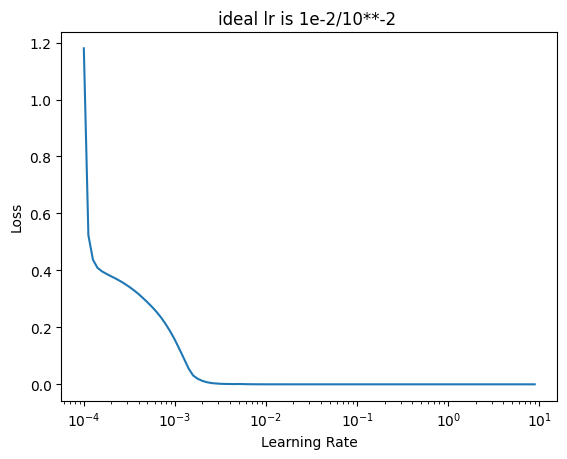

In [ ]:
# plot loss vs lr
lr = 1e-4*(10**(tf.range(100)/20))
plt.semilogx(lr,hist.history['loss'])
plt.title('ideal lr is 1e-2/10**-2 ')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()


In [ ]:

# Set lr = 0.01
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation= 'relu'),
    tf.keras.layers.Dense(1,activation= 'sigmoid')
])

model3.compile(loss='binary_crossentropy',metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
h = model3.fit(padded,training_labels_final,batch_size=128,epochs=100,
           validation_data=(testing_padded,testing_labels_final))


Epoch 1/100
35/35 [==============================] - 2s 20ms/step - loss: 0.3006 - accuracy: 0.8425 - val_loss: 0.1380 - val_accuracy: 0.8753
Epoch 2/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0526 - accuracy: 0.9796 - val_loss: 0.0521 - val_accuracy: 0.9865
Epoch 3/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0114 - accuracy: 0.9973 - val_loss: 0.0414 - val_accuracy: 0.9874
Epoch 4/100
35/35 [==============================] - 0s 13ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0627 - val_accuracy: 0.9883
Epoch 5/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.0561 - val_accuracy: 0.9874
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 1.1463e-04 - accuracy: 1.0000 - val_loss: 0.0591 - val_accuracy: 0.9883
Epoch 7/100
35/35 [==============================] - 0s 7ms/step - loss: 5.7325e-05 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9883
E

In [ ]:
import random
ans=model3.predict(testing_padded,batch_size=128)
def Sample_Ans(num_sample=10):
  for i in range(num_sample):
    i=random.randrange(int(len(testing_padded)))
    print(f'''

      Prediction:{int(ans[i])},
      Sentence: {testing_sentences[i]},
      label:{testing_labels_final[i]}

        ''')


9/9 [==============================] - 0s 3ms/step


<Axes: >

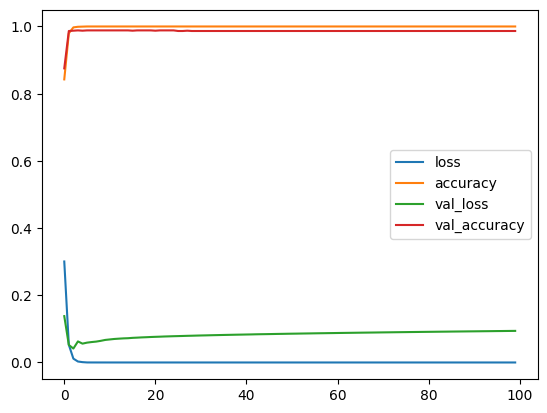

In [ ]:
#
pd.DataFrame(h.history).plot()

In [ ]:
model3.evaluate(testing_padded,testing_labels_final)

35/35 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9865


[0.09402327239513397, 0.9865471124649048]

In [ ]:
Sample_Ans()



      Prediction:1,
      Sentence: Urgent! Please call 09061213237 from landline. £5000 cash or a luxury 4* Canary Islands Holiday await collection. T&Cs SAE PO Box 177. M227XY. 150ppm. 16+,
      label:1

        


      Prediction:0,
      Sentence: You have to pls make a note of all she.s exposed to. Also find out from her school if anyone else was vomiting. Is there a dog or cat in the house? Let me know later.,
      label:0

        


      Prediction:0,
      Sentence: I'm fine. Hope you are good. Do take care.,
      label:0

        


      Prediction:0,
      Sentence: Nope thats fine. I might have a nap tho!,
      label:0

        


      Prediction:0,
      Sentence: It's wylie, you in tampa or sarasota?,
      label:0

        


      Prediction:0,
      Sentence: Very strange.  and  are watching the 2nd one now but i'm in bed. Sweet dreams, miss u,
      label:0

        


      Prediction:1,
      Sentence: You won't believe it but it's true. It's Incredible Tx

## Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
ans

array([[1.3733353e-10],
       [9.7948637e-12],
       [5.4030997e-09],
       ...,
       [5.5459701e-08],
       [2.0192230e-08],
       [2.3636755e-08]], dtype=float32)

In [ ]:
tf.round(ans)

<tf.Tensor: shape=(1115, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(testing_labels_final,tf.round(ans))

array([[964,   6],
       [  9, 136]])